In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools


test_dir = 'patient_17/'
batch_size = 10000
block_size = 63

model = tf.keras.models.load_model('./models/Size_63_epoch_25_range_14_conv_3_regularized_dropout.keras')
# Check its architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)               6554400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.2) # set validation split
 
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(block_size, block_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    subset='training') # set as training data

Found 9200 images belonging to 23 classes.


In [12]:
test_x, test_y = next(test_generator)
test_x.shape

(9200, 63, 63, 1)

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(11,11))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
results = model.predict(test_x)
# convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)
rounded_y = np.argmax(test_y, axis=1)

In [15]:
oredered_labels = ['adrenal_gland_left',
'adrenal_gland_rigth',
'aorta',
'background',
'body_envelope',
'first_lumbar_vertebra',
'gallbladder',
'kidney_left',
'kidney_right',
'liver',
'lung_left',
'lung_right',
'muscle_body_of_left_rectus_abdominis',
'muscle_body_of_right_rectus_abdominis',
'pancreas',
'psoas_major_left',
'psoas_major_right',
'spleen',
'sternum',
'thorax-abdomen',
'thyroid_gland',
'trachea',
'urinary_bladder']

Normalized confusion matrix


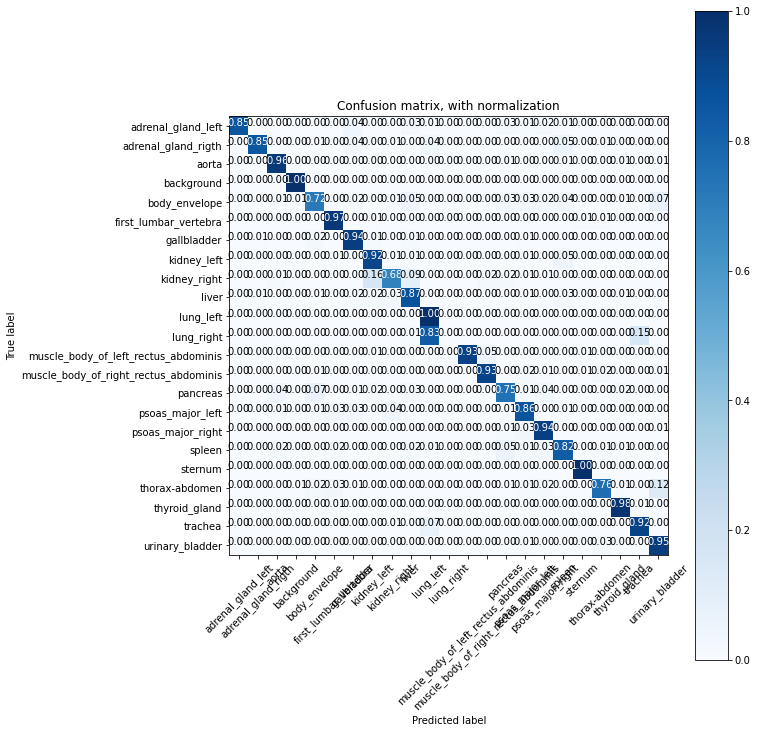

In [16]:
# Generate the confusion matrix
cnf_matrix = confusion_matrix(rounded_y, predicted_classes)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=oredered_labels,normalize=True, title='Confusion matrix, with normalization')

In [17]:
equality = tf.equal(predicted_classes, rounded_y)
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
print(accuracy)

tf.Tensor(0.8521739, shape=(), dtype=float32)
